Top-rated Restaurant Chains:
               Restaurant Name  avg_rating  total_votes  avg_votes
629           Talaga Sampireun       4.900         5514     1838.0
589           Silantro Fil-Mex       4.850         1364      682.0
8      AB's Absolute Barbecues       4.850         3151     1575.5
7    AB's - Absolute Barbecues       4.825        13400     3350.0
449         Naturals Ice Cream       4.800         3094     1547.0


<Figure size 1000x600 with 0 Axes>

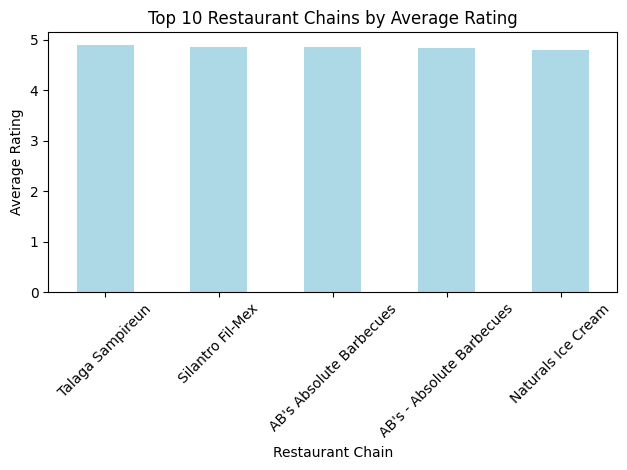

<Figure size 1000x600 with 0 Axes>

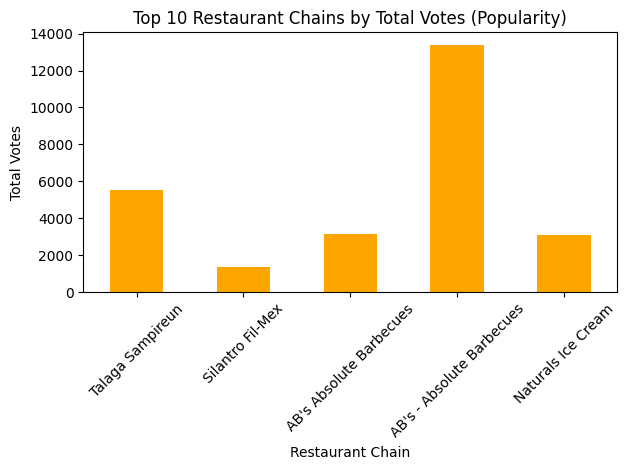

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/Dataset .csv'
data = pd.read_csv(file_path)

data.dropna(subset=['Restaurant Name', 'Aggregate rating', 'Votes'], inplace=True)

restaurant_chains = data.groupby('Restaurant Name').size().reset_index(name='count')
chains = restaurant_chains[restaurant_chains['count'] > 1]

chain_restaurants = pd.merge(data, chains[['Restaurant Name']], on='Restaurant Name')

ratings_analysis = chain_restaurants.groupby('Restaurant Name').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    avg_votes=('Votes', 'mean')
).reset_index()

top_rated_chains = ratings_analysis.sort_values(by='avg_rating', ascending=False)

print("Top-rated Restaurant Chains:")
print(top_rated_chains[['Restaurant Name', 'avg_rating', 'total_votes', 'avg_votes']].head(5))

plt.figure(figsize=(10, 6))
top_rated_chains.head(5).plot(kind='bar', x='Restaurant Name', y='avg_rating', color='lightblue', legend=False)
plt.title('Top 10 Restaurant Chains by Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Restaurant Chain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
top_rated_chains.head(5).plot(kind='bar', x='Restaurant Name', y='total_votes', color='orange', legend=False)
plt.title('Top 10 Restaurant Chains by Total Votes (Popularity)')
plt.ylabel('Total Votes')
plt.xlabel('Restaurant Chain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
